In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
pd.to_datetime('2018-01-15 3:45pm')


Timestamp('2018-01-15 15:45:00')

In [4]:
pd.to_datetime('7/8/1952')


Timestamp('1952-07-08 00:00:00')

In [5]:
pd.to_datetime('7/8/1952', dayfirst=True)


Timestamp('1952-08-07 00:00:00')

In [ ]:
pd.to_datetime(['2018-01-05', '7/8/1952', 'Oct 10, 1995'])


DatetimeIndex(['2018-01-05', '1952-07-08', '1995-10-10'], dtype='datetime64[ns]', freq=None)

In [ ]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

# **Read data**

In [6]:
data = pd.read_csv('/content/drive/MyDrive/Time_Series/opsd_germany_daily.csv')
print(data.shape)
print(data.info())
print(data.describe())


(4383, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB
None
       Consumption         Wind        Solar   Wind+Solar
count  4383.000000  2920.000000  2188.000000  2187.000000
mean   1338.675836   164.814173    89.258695   272.663481
std     165.775710   143.692732    58.550099   146.319884
min     842.395000     5.757000     1.968000    21.478000
25%    1217.859000    62.353250    35.179250   172.185500
50%    1367.123000   119.098000    86.407000   240.991000
75%    1457.761000   217.900250   135.071500   338.988000
max    1709.568000   826.278000   241.580000   851.556000


In [ ]:
print(data.describe(datetime_is_numeric=True))

       Consumption         Wind        Solar   Wind+Solar
count  4383.000000  2920.000000  2188.000000  2187.000000
mean   1338.675836   164.814173    89.258695   272.663481
std     165.775710   143.692732    58.550099   146.319884
min     842.395000     5.757000     1.968000    21.478000
25%    1217.859000    62.353250    35.179250   172.185500
50%    1367.123000   119.098000    86.407000   240.991000
75%    1457.761000   217.900250   135.071500   338.988000
max    1709.568000   826.278000   241.580000   851.556000


In [ ]:
data.describe(include=[object])

,Date
count,4383
unique,4383
top,2013-02-11
freq,1


In [ ]:
print(data.head())
print(data.dtypes)

         Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
3  2006-01-04     1457.217   NaN    NaN         NaN
4  2006-01-05     1477.131   NaN    NaN         NaN
Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


# **index data for selection by column 0**

In [ ]:
data.index

RangeIndex(start=0, stop=4383, step=1)

In [ ]:
# index is consumption
data = pd.read_csv('/content/drive/MyDrive/Time_Series/opsd_germany_daily.csv', index_col=1, parse_dates=True)
print(data.head())

                   Date  Wind  Solar  Wind+Solar
Consumption                                     
1069.184     2006-01-01   NaN    NaN         NaN
1380.521     2006-01-02   NaN    NaN         NaN
1442.533     2006-01-03   NaN    NaN         NaN
1457.217     2006-01-04   NaN    NaN         NaN
1477.131     2006-01-05   NaN    NaN         NaN


In [ ]:
# index is data
data = pd.read_csv('/content/drive/MyDrive/Time_Series/opsd_germany_daily.csv', index_col=0, parse_dates=True)
print(data.head())



            Consumption  Wind  Solar  Wind+Solar
Date                                            
2006-01-01     1069.184   NaN    NaN         NaN
2006-01-02     1380.521   NaN    NaN         NaN
2006-01-03     1442.533   NaN    NaN         NaN
2006-01-04     1457.217   NaN    NaN         NaN
2006-01-05     1477.131   NaN    NaN         NaN


In [ ]:
# Or
data=data.set_index('Date')
print(data.head())

            Wind  Solar  Wind+Solar
Date                               
2006-01-01   NaN    NaN         NaN
2006-01-02   NaN    NaN         NaN
2006-01-03   NaN    NaN         NaN
2006-01-04   NaN    NaN         NaN
2006-01-05   NaN    NaN         NaN


# **Add columns with year, month, and weekday name**


In [ ]:

data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday'] = data.index.day_name
# Display a random sampling of 5 rows
data.sample(5)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2007-10-21,1190.55000,NaN,NaN,NaN,2007,10,<bound method inherit_from_data.<locals>.metho...
2017-12-23,1272.17085,748.074,8.450,756.524,2017,12,<bound method inherit_from_data.<locals>.metho...
2015-06-27,1175.91200,166.768,112.506,279.274,2015,6,<bound method inherit_from_data.<locals>.metho...
2009-11-14,1220.36100,NaN,NaN,NaN,2009,11,<bound method inherit_from_data.<locals>.metho...
2016-06-20,1377.79500,225.611,185.492,411.103,2016,6,<bound method inherit_from_data.<locals>.metho...


In [ ]:
data.loc['2007-10-21']


Consumption                                              1190.55
Wind                                                         NaN
Solar                                                        NaN
Wind+Solar                                                   NaN
Year                                                        2007
Month                                                         10
Weekday        <bound method inherit_from_data.<locals>.metho...
Name: 2007-10-21 00:00:00, dtype: object

In [ ]:
data.loc['2014-01-20':'2014-01-22']


,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,<bound method inherit_from_data.<locals>.metho...
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,<bound method inherit_from_data.<locals>.metho...
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,<bound method inherit_from_data.<locals>.metho...


In [ ]:
data.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,<bound method inherit_from_data.<locals>.metho...
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,<bound method inherit_from_data.<locals>.metho...
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,<bound method inherit_from_data.<locals>.metho...
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,<bound method inherit_from_data.<locals>.metho...
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,<bound method inherit_from_data.<locals>.metho...
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,<bound method inherit_from_data.<locals>.metho...
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,<bound method inherit_from_data.<locals>.metho...
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,<bound method inherit_from_data.<locals>.metho...
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,<bound method inherit_from_data.<locals>.metho...


# **Plotting**

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

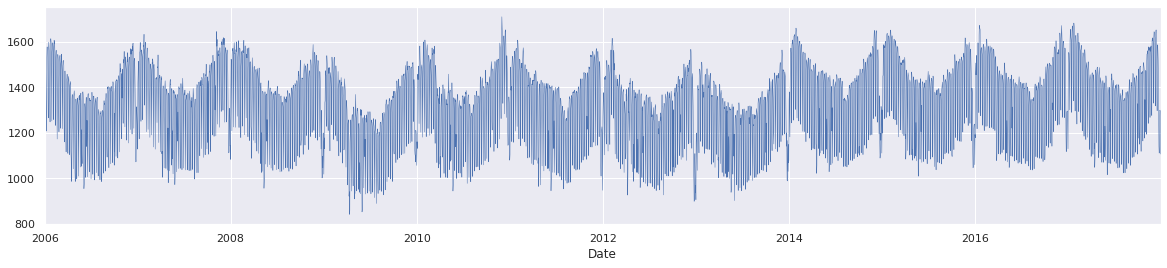

In [91]:
#sns.set(rc={'figure.figsize':(8, 8)})
plt.figure(figsize=(20,4))
data['Consumption'].plot(linewidth=0.5)

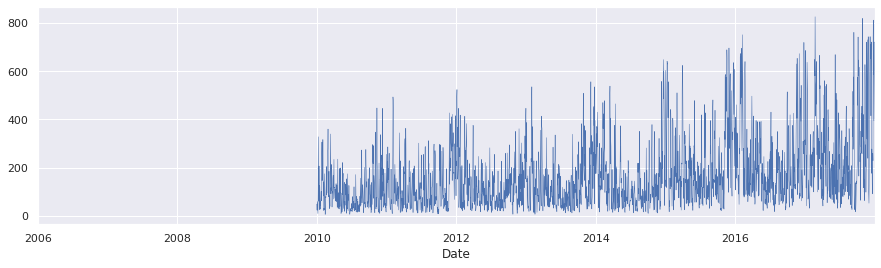

In [90]:
plt.figure(figsize=(15,4))
data['Wind'].plot(linewidth=0.5)

In [92]:
data.columns


Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'Weekday'],
      dtype='object')

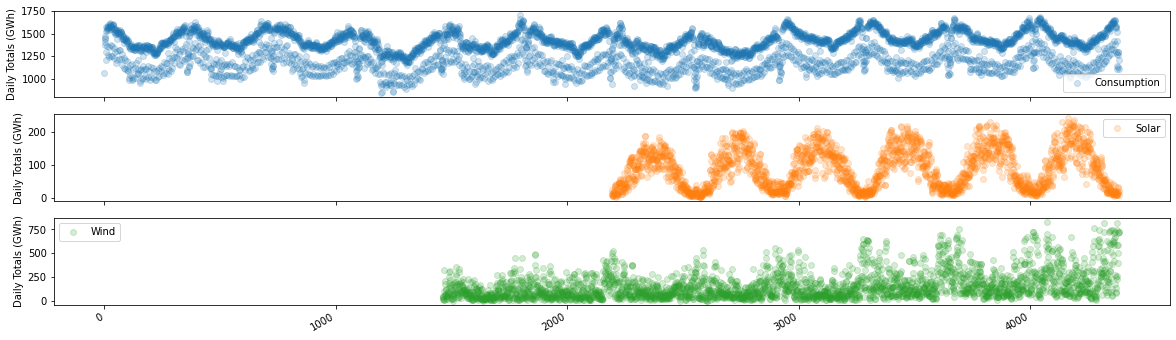

In [8]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = data[cols_plot].plot(marker='o', alpha=0.2, linestyle='None', 
                 figsize=(20,6), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

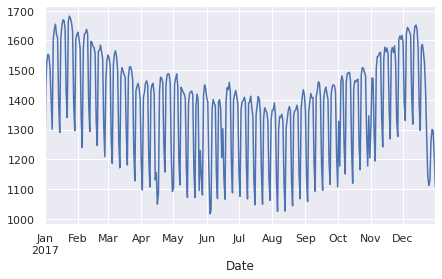

In [94]:
data.loc['2017', 'Consumption'].plot()


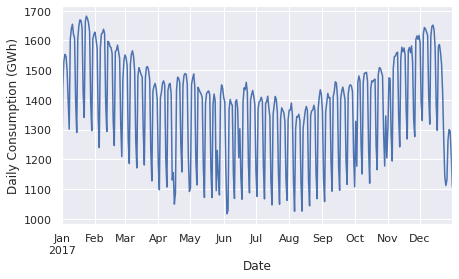

In [96]:
ax = data.loc['2017', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

Text(0.5, 1.0, 'Jan-Feb 2017 Electricity Consumption')

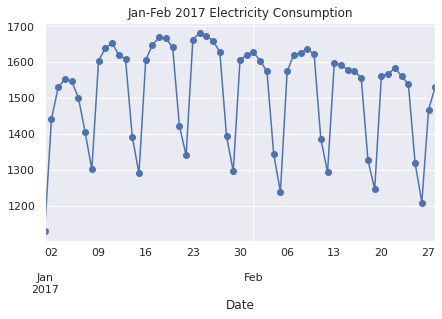

In [101]:
ax= data.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_title('Jan-Feb 2017 Electricity Consumption')


# **========================================================================================================================================**

In [29]:
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR # auto regrition 
from statsmodels.tsa.arima_model import ARMA # auto regrition moving average
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

## **AR example**

range(1, 100)
[1.0954850141219028, 4.271772330405063, 5.917173800983859, 6.797122449418696, 6.873992463140837, 8.64244028767978, 8.055496604863794, 8.682859890650501, 11.653948802787918, 11.737120548508495, 11.253127130748402, 12.539310596916234, 14.461370111489249, 15.042841843131814, 17.492931648904708, 17.94667093068933, 17.991840455428374, 18.355559891906964, 21.583575167194816, 20.21724793629422, 21.999431261298238, 23.92247136373649, 25.480311513099835, 26.749086162223296, 27.70568162515165, 26.683127703368115, 28.662368672591057, 30.03817527553039, 31.669327846349656, 30.942202631517056, 33.814919504554894, 33.64576375743139, 34.77116289075074, 36.16586434694319, 35.043143978345164, 37.36647290456055, 37.26750184801869, 38.52873512271549, 41.84008861091544, 42.8911971803407, 41.26867121402189, 42.215248806068516, 45.22065782642261, 44.97983813106573, 46.160113006174285, 48.28577123736742, 49.72314674931884, 48.45517074443889, 50.93693183223018, 50.706349817113896, 51.56312259442

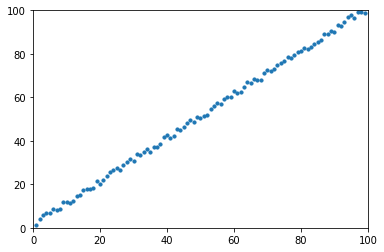

In [18]:
# contrived dataset
xdata = range(1, 100)
print(xdata)
ydata = [x + (3*random()) for x in xdata]
print(ydata)

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.scatter(xdata,ydata,s=10)
plt.show()
print()

In [27]:
# fit model
ar_model = AR(ydata)
ar_fitting= ar_model.fit()

# Make prediction
#yhat = model_fit.predict(len(xdata), len(ydata))
yhat = ar_fitting.predict( start= 90, end = 110 )
print('Predicted value for Auto Regression ', yhat)

Predicted value for Auto Regression  [ 91.60894103  92.64526781  93.90270672  95.10193963  96.65352327
  96.90282396  98.74556587  99.5850024   99.89548933 101.61553431
 103.12010087 103.13370529 104.73321809 106.03127226 105.94526401
 107.13190127 108.51695262 109.16867204 110.1729738  111.73572852
 112.48904604]


# **ARMA example**

In [38]:
# change order
newdata = [random() for x in range(1, 100)]
print(newdata)
arma = ARMA(newdata, order=(2, 1))
arma_fit = arma.fit(disp=False)
# make prediction
yhat = arma_fit.predict( start= 90, end = 110 )
print('Predicted value for Moving Average 2,1 ',newdata)


[0.9405186178306713, 0.053762005173292216, 0.2135723515945388, 0.17153129987230342, 0.6325611421707528, 0.45599811987949057, 0.47119682545692043, 0.35676111951646317, 0.9485396248835369, 0.07167958510462402, 0.5785533870971992, 0.3516998167973424, 0.7740773363690683, 0.5553356309105589, 0.9248735587784184, 0.9483913299512885, 0.3838609152225295, 0.639973448939614, 0.8045529096115062, 0.6816290422038029, 0.7530550351665831, 0.25727052677581685, 0.8581044257292302, 0.8535269982156147, 0.5630457586939829, 0.6268270314388212, 0.8984087532457066, 0.13501352028013824, 0.13920079216747538, 0.9272226089914736, 0.2808728270968066, 0.9034621837804268, 0.25618549077934816, 0.15989158087510358, 0.06442515375406332, 0.27328462418726784, 0.3477010015372044, 0.6530813159549511, 0.9416668408264112, 0.32899881129409125, 0.8915240021672842, 0.09430349603228838, 0.5378984226315415, 0.0981414215903248, 0.3006010364447873, 0.9081666548815598, 0.4431187763570248, 0.7591487080846581, 0.49485125699578525, 0.7

# VAR example

In [40]:
# contrived dataset with dependency
data = []
for i in range(10):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
    
data    


[[0.6476434941367444, 1.3514382856467337],
 [1.4967163976177107, 1.7529403717858867],
 [2.6348831248957993, 2.8812872851308584],
 [3.7359757348554767, 4.712411721593494],
 [4.875284709720323, 5.7879513863880625],
 [5.755956076766761, 6.017893149451337],
 [6.750781564506139, 7.60901548127397],
 [7.5867611034059665, 8.162283453917079],
 [8.818948799363389, 9.317175028316292],
 [9.169175283715017, 9.862293281470153]]

In [44]:
# fit model
var = VAR(data)
var_fit = var.fit()
# make prediction
yhat = var_fit.forecast(var_fit.y, steps=1)
print('Predicted value using VAR ',yhat)

Predicted value using VAR  [[ 9.93151347 10.62794668]]


/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
